# Came on the 180th position in this hackathon out of 467 people:
- https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics-ii/#LeaderBoard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
data_copy["patientid"] = 1

for i in data_copy["patientid"].unique():
    filt = data_copy["patientid"] == i

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_schema = pd.read_csv("train_data_dict.csv")
df_train.drop(columns=["case_id"], inplace=True)
df_train.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50


In [3]:
df_train.rename(columns = {"Available Extra Rooms in Hospital": "Extra_rms",
                           "Bed Grade": "Bed",
                           "Type of Admission": "Admission",
                           "Severity of Illness": "Illness",
                           "Visitors with Patient": "Visitors"
                          }, inplace=True)

df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,patientid,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df_test.rename(columns = {"Available Extra Rooms in Hospital": "Extra_rms",
                           "Bed Grade": "Bed",
                           "Type of Admission": "Admission",
                           "Severity of Illness": "Illness",
                           "Visitors with Patient": "Visitors"
                          }, inplace=True)

In [5]:
df_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,patientid,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [6]:
df_schema

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Hospital_code         318438 non-null  int64  
 1   Hospital_type_code    318438 non-null  object 
 2   City_Code_Hospital    318438 non-null  int64  
 3   Hospital_region_code  318438 non-null  object 
 4   Extra_rms             318438 non-null  int64  
 5   Department            318438 non-null  object 
 6   Ward_Type             318438 non-null  object 
 7   Ward_Facility_Code    318438 non-null  object 
 8   Bed                   318325 non-null  float64
 9   patientid             318438 non-null  int64  
 10  City_Code_Patient     313906 non-null  float64
 11  Admission             318438 non-null  object 
 12  Illness               318438 non-null  object 
 13  Visitors              318438 non-null  int64  
 14  Age                   318438 non-null  object 
 15  

In [8]:
df_train.isnull().sum()

Hospital_code              0
Hospital_type_code         0
City_Code_Hospital         0
Hospital_region_code       0
Extra_rms                  0
Department                 0
Ward_Type                  0
Ward_Facility_Code         0
Bed                      113
patientid                  0
City_Code_Patient       4532
Admission                  0
Illness                    0
Visitors                   0
Age                        0
Admission_Deposit          0
Stay                       0
dtype: int64

Filling null values

In [9]:
df_train.City_Code_Patient.value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [10]:
grade1 = df_train["Bed"] == 1
grade2 = df_train["Bed"] == 2
grade3 = df_train["Bed"] == 3
grade4 = df_train["Bed"] == 4

In [11]:
def cat_vs_cat(column):
    print(f"======grade1-{column}=====\n{df_train[grade1][column].value_counts()/len(df_train[grade1])*100}\n")
    print(f"======grade2-{column}=====\n{df_train[grade2][column].value_counts()/len(df_train[grade2])*100}\n")
    print(f"======grade3-{column}=====\n{df_train[grade3][column].value_counts()/len(df_train[grade3])*100}\n")
    print(f"======grade4-{column}=====\n{df_train[grade4][column].value_counts()/len(df_train[grade4])*100}")

In [12]:
lst = ["Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Hospital_region_code", "Extra_rms", "Department",
               "Illness", "Admission", "Admission_Deposit"]

In [13]:
for column in ["Department", "Illness", "Admission", "Hospital_region_code", "Ward_Type"]:
    print(column)
    for i in range(len(df_train[column].value_counts())):
        filt = df_train[column]==df_train[column].value_counts().index[i]
        print(f"======{df_train[column].value_counts().index[i]}-Bed=====\n")
        print(df_train[filt]["Bed"].value_counts()/len(df_train[filt])*100, "\n")
    print("=======================================")

Department
======gynecology-Bed=====

2.0    40.673625
3.0    33.368606
4.0    16.821786
1.0     9.096302
Name: Bed, dtype: float64 

======anesthesia-Bed=====

3.0    47.148302
4.0    27.565854
2.0    24.189686
1.0     1.089413
Name: Bed, dtype: float64 

======radiotherapy-Bed=====

2.0    38.788750
3.0    33.384766
4.0    18.361622
1.0     9.429794
Name: Bed, dtype: float64 

======TB & Chest disease-Bed=====

3.0    37.220947
2.0    35.593574
4.0    21.364490
1.0     5.800125
Name: Bed, dtype: float64 

======surgery-Bed=====

2.0    45.878435
3.0    22.148210
1.0    20.233139
4.0    11.740216
Name: Bed, dtype: float64 

Illness
======Moderate-Bed=====

2.0    47.508857
3.0    30.271322
4.0    16.198541
1.0     5.992846
Name: Bed, dtype: float64 

======Minor-Bed=====

3.0    51.249534
4.0    25.044252
2.0    21.458683
1.0     2.221912
Name: Bed, dtype: float64 

======Extreme-Bed=====

2.0    38.261375
1.0    24.785360
3.0    23.524849
4.0    13.356134
Name: Bed, dtype: float64 



In [14]:
df_train[df_train.Bed == 1].describe()

,Hospital_code,City_Code_Hospital,Extra_rms,Bed,patientid,City_Code_Patient,Visitors,Admission_Deposit
count,26505.000000,26505.000000,26505.000000,26505.0,26505.000000,26212.000000,26505.000000,26505.000000
mean,18.458593,4.958649,3.422901,1.0,65818.374722,7.393026,3.287644,4623.327787
std,8.039066,2.927865,1.172889,0.0,37832.240718,4.335634,1.380284,1040.102054
min,1.000000,1.000000,1.000000,1.0,9.000000,1.000000,0.000000,1802.000000
25%,12.000000,2.000000,3.000000,1.0,33151.000000,5.000000,2.000000,3965.000000
50%,19.000000,5.000000,3.000000,1.0,66105.000000,8.000000,3.000000,4487.000000
75%,26.000000,7.000000,4.000000,1.0,98591.000000,8.000000,4.000000,5111.000000
max,32.000000,13.000000,12.000000,1.0,131623.000000,37.000000,18.000000,11008.000000


In [15]:
df_train[df_train.Bed == 2].describe()

,Hospital_code,City_Code_Hospital,Extra_rms,Bed,patientid,City_Code_Patient,Visitors,Admission_Deposit
count,123671.000000,123671.000000,123671.000000,123671.0,123671.000000,122297.000000,123671.000000,123671.000000
mean,18.417365,4.911265,3.319921,2.0,65645.133629,7.233931,3.044918,4849.655578
std,8.620057,3.085316,1.162663,0.0,37971.493266,4.701951,1.250010,1049.192988
min,1.000000,1.000000,0.000000,2.0,2.000000,1.000000,0.000000,1802.000000
25%,11.000000,2.000000,2.000000,2.0,32800.000000,4.000000,2.000000,4184.000000
50%,19.000000,5.000000,3.000000,2.0,65572.000000,8.000000,3.000000,4710.000000
75%,26.000000,7.000000,4.000000,2.0,98321.500000,8.000000,4.000000,5349.000000
max,32.000000,13.000000,14.000000,2.0,131624.000000,38.000000,23.000000,10793.000000


In [16]:
df_train[df_train.Bed == 3].describe()

,Hospital_code,City_Code_Hospital,Extra_rms,Bed,patientid,City_Code_Patient,Visitors,Admission_Deposit
count,110583.000000,110583.000000,110583.000000,110583.0,110583.000000,108878.000000,110583.000000,110583.000000
mean,18.313167,4.708084,3.101851,3.0,65771.176501,7.289241,3.422343,4934.135292
std,8.670960,3.171997,1.154071,0.0,37964.830519,4.807989,2.031838,1102.854107
min,1.000000,1.000000,0.000000,3.0,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,3.0,32942.000000,4.000000,2.000000,4229.000000
50%,19.000000,5.000000,3.000000,3.0,65738.000000,8.000000,3.000000,4796.000000
75%,26.000000,7.000000,4.000000,3.0,98473.000000,8.000000,4.000000,5482.000000
max,32.000000,13.000000,24.000000,3.0,131622.000000,38.000000,32.000000,11008.000000


In [17]:
df_train[df_train.Bed == 4].describe()

,Hospital_code,City_Code_Hospital,Extra_rms,Bed,patientid,City_Code_Patient,Visitors,Admission_Deposit
count,57566.000000,57566.000000,57566.000000,57566.0,57566.000000,56406.000000,57566.000000,57566.000000
mean,18.077633,4.505767,3.014505,4.0,65893.073498,7.156242,3.531043,4964.119237
std,8.840016,3.063064,1.159277,0.0,38098.462415,4.894374,2.196726,1134.695667
min,1.000000,1.000000,0.000000,4.0,1.000000,1.000000,0.000000,1805.000000
25%,11.000000,2.000000,2.000000,4.0,32648.250000,4.000000,2.000000,4235.000000
50%,19.000000,4.000000,3.000000,4.0,65940.500000,8.000000,3.000000,4824.000000
75%,26.000000,6.000000,4.000000,4.0,98788.000000,8.000000,4.000000,5526.000000
max,32.000000,13.000000,21.000000,4.0,131624.000000,38.000000,32.000000,10999.000000


In [18]:
filt = (df_train.Bed.isnull())&(df_train.Illness == "Minor")
df_train.loc[filt, "Bed"] = 3

In [19]:
df_train.loc[df_train.Bed.isnull(), "Bed"] = 3

In [20]:
df_train.isnull().sum()

Hospital_code              0
Hospital_type_code         0
City_Code_Hospital         0
Hospital_region_code       0
Extra_rms                  0
Department                 0
Ward_Type                  0
Ward_Facility_Code         0
Bed                        0
patientid                  0
City_Code_Patient       4532
Admission                  0
Illness                    0
Visitors                   0
Age                        0
Admission_Deposit          0
Stay                       0
dtype: int64

In [21]:
for column in ["City_Code_Hospital", "Hospital_region_code", "Age"]:
    print(column)
    for i in range(len(df_train[column].value_counts())):
        filt = df_train[column]==df_train[column].value_counts().index[i]
        print(f"======{df_train[column].value_counts().index[i]}-City_Code_Patient=====\n")
        print(df_train[filt]["City_Code_Patient"].value_counts()/len(df_train[filt])*100, "\n")
    print("=======================================")

City_Code_Hospital
======1-City_Code_Patient=====

8.0     31.605572
1.0     13.864248
2.0     12.577912
10.0     8.205814
7.0      6.176944
5.0      4.401004
4.0      3.943922
15.0     3.412766
9.0      2.529313
3.0      2.101136
12.0     1.510361
6.0      1.313436
23.0     1.134578
14.0     0.991852
16.0     0.843707
19.0     0.413723
18.0     0.397463
13.0     0.392044
25.0     0.332424
21.0     0.303518
26.0     0.270998
20.0     0.218605
22.0     0.186085
11.0     0.158985
27.0     0.146339
24.0     0.133692
28.0     0.090333
30.0     0.065039
29.0     0.030713
31.0     0.030713
33.0     0.027100
37.0     0.025293
34.0     0.023486
32.0     0.019873
36.0     0.003613
35.0     0.003613
Name: City_Code_Patient, dtype: float64 

======2-City_Code_Patient=====

8.0     47.825667
2.0     11.714181
7.0      6.971762
5.0      5.583972
4.0      4.337084
1.0      3.337258
9.0      3.314096
15.0     3.146172
6.0      1.524832
12.0     1.439904
23.0     1.410952
13.0     1.279700
10.0     1.

======Y-City_Code_Patient=====

8.0     55.345182
7.0     10.276244
2.0      6.926520
5.0      4.562682
4.0      3.621721
9.0      2.777959
1.0      2.325448
12.0     2.191492
15.0     2.186591
23.0     1.433496
6.0      1.128827
3.0      0.799654
14.0     0.726141
13.0     0.715523
10.0     0.609338
18.0     0.566047
16.0     0.548077
20.0     0.329990
26.0     0.289966
21.0     0.285066
19.0     0.258111
25.0     0.212370
11.0     0.173163
28.0     0.145392
27.0     0.120071
24.0     0.091482
29.0     0.042474
33.0     0.037573
22.0     0.033489
30.0     0.026138
31.0     0.024504
32.0     0.017153
34.0     0.016336
37.0     0.013886
35.0     0.008168
36.0     0.004084
38.0     0.004084
Name: City_Code_Patient, dtype: float64 

======Z-City_Code_Patient=====

8.0     27.513802
5.0     15.928455
4.0     11.444937
9.0      9.263810
6.0      5.632320
7.0      5.630724
2.0      4.829754
1.0      2.795418
15.0     2.187510
12.0     2.138048
21.0     1.554073
14.0     1.330695
23.0     1.2

In [22]:
filt = (df_train["City_Code_Patient"].isnull())&(df_train["City_Code_Hospital"] == 11)
df_train.loc[filt, "City_Code_Patient"] = 1

In [23]:
df_train.loc[df_train["City_Code_Patient"].isnull(), "City_Code_Patient"] = 8

In [24]:
df_train.isnull().sum()

Hospital_code           0
Hospital_type_code      0
City_Code_Hospital      0
Hospital_region_code    0
Extra_rms               0
Department              0
Ward_Type               0
Ward_Facility_Code      0
Bed                     0
patientid               0
City_Code_Patient       0
Admission               0
Illness                 0
Visitors                0
Age                     0
Admission_Deposit       0
Stay                    0
dtype: int64

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Hospital_code         318438 non-null  int64  
 1   Hospital_type_code    318438 non-null  object 
 2   City_Code_Hospital    318438 non-null  int64  
 3   Hospital_region_code  318438 non-null  object 
 4   Extra_rms             318438 non-null  int64  
 5   Department            318438 non-null  object 
 6   Ward_Type             318438 non-null  object 
 7   Ward_Facility_Code    318438 non-null  object 
 8   Bed                   318438 non-null  float64
 9   patientid             318438 non-null  int64  
 10  City_Code_Patient     318438 non-null  float64
 11  Admission             318438 non-null  object 
 12  Illness               318438 non-null  object 
 13  Visitors              318438 non-null  int64  
 14  Age                   318438 non-null  object 
 15  

In [26]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,patientid,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [27]:
print(df_train[df_train.patientid == 90620]["City_Code_Patient"].value_counts())

1.0    11
8.0     6
Name: City_Code_Patient, dtype: int64


In [29]:
df_train.head(7)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,patientid,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10


In [30]:
df_train1 = df_train.copy()

In [31]:
df_train.Extra_rms.value_counts().sort_index()

0        15
1      5582
2     98311
3     91520
4     91709
5     19288
6      7786
7      2876
8      1027
9       218
10       67
11       17
12       13
13        2
14        1
20        2
21        3
24        1
Name: Extra_rms, dtype: int64

In [32]:
target_mapping = {df_train.Stay.value_counts().sort_index().index[i]: i for i in range(11)}
df_train.Stay = df_train.Stay.map(target_mapping)

In [33]:
age_mapping = {df_train.Age.value_counts().sort_index().index[i]: i for i in range(10)}
df_train.Age = df_train.Age.map(age_mapping)

In [34]:
def encoder(cat, cont):
    print(f"{cat} relation with {cont}")
    grp = df_train.groupby([cat])
    lst = grp[cont].median().sort_values().index
    feature_map = {lst[i]: i for i in range(len(lst))}
    df_train[cat] = df_train[cat].map(feature_map)
    print("Order:", lst) 

In [35]:
df_train.drop(columns = ["patientid"], inplace=True)
df_train.Illness = df_train.Illness.map({"Extreme":2, "Moderate":1, "Minor": 0})

In [36]:
cat_ord = ["Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Hospital_region_code",
           "Department", "Ward_Type", "Ward_Facility_Code", "City_Code_Patient", "Admission","Bed",
           "Illness", "Age"]
for column in cat_ord:
    encoder(column, "Stay")

Hospital_code relation with Stay
Order: Int64Index([ 7,  1, 25, 24, 23, 28, 21, 29, 19, 18, 17, 31, 15, 14, 13, 12, 11,
            10,  9,  8,  6,  5,  4,  3, 30, 26, 27, 16, 20,  2, 22, 32],
           dtype='int64', name='Hospital_code')
Hospital_type_code relation with Stay
Order: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object', name='Hospital_type_code')
City_Code_Hospital relation with Stay
Order: Int64Index([1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13], dtype='int64', name='City_Code_Hospital')
Hospital_region_code relation with Stay
Order: Index(['X', 'Y', 'Z'], dtype='object', name='Hospital_region_code')
Department relation with Stay
Order: Index(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'],
      dtype='object', name='Department')
Ward_Type relation with Stay
Order: Index(['P', 'Q', 'R', 'T', 'U', 'S'], dtype='object', name='Ward_Type')
Ward_Facility_Code relation with Stay
Order: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', 

In [37]:
# df_train["positive"] = df_train["Age"]+df_train["Visitors"]+df_train["Illness"]+df_train["Bed"]
# df_train["negative"] = df_train["Admission_Deposit"]+df_train["Extra_rms"]
# df_train["net"] = df_train["negative"] - df_train["positive"]

In [39]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,Stay,positive,negative,net
0,19,2,2,2,3,3,2,5,1,24,0,2,2,5,4911.0,0,10,4914.0,4904.0
1,29,2,4,2,2,3,5,5,1,24,1,2,2,5,5954.0,4,10,5956.0,5946.0
2,17,4,0,0,2,1,5,4,1,24,1,2,2,5,4745.0,3,10,4747.0,4737.0
3,25,1,1,1,2,3,2,3,1,24,1,2,2,5,7272.0,4,10,7274.0,7264.0
4,25,1,1,1,2,3,5,3,1,24,1,2,2,5,5558.0,4,10,5560.0,5550.0


In [40]:
log_columns = ["Extra_rms", "Admission_Deposit", "Visitors", "positive", "negative", "net"]

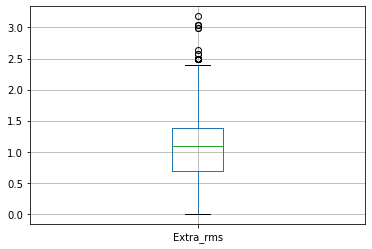

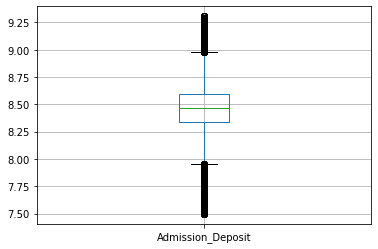

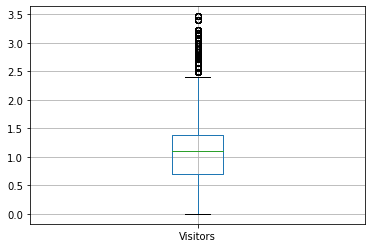

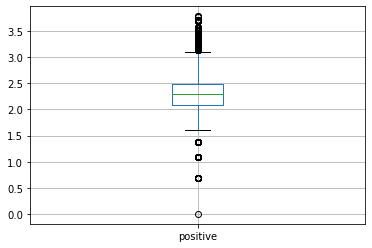

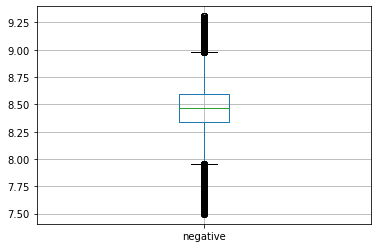

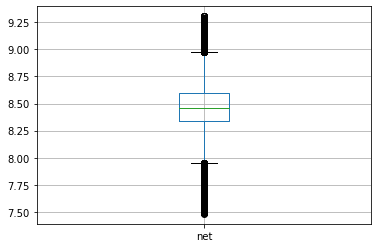

In [41]:
for column in log_columns:
    df_train[column] = df_train[column].map(lambda i: np.log(i) if i > 0 else 0) 
    df_train.boxplot([column])
    plt.show()

In [42]:
# for column in df_train.drop(columns=["Stay"]).columns:
#     plt.scatter(x=df_train[column], y=df_train["Stay"])
#     plt.ylabel("Stay")
#     plt.xlabel(column)
#     plt.show()

In [43]:
features = df_train.drop(columns=["Stay", "positive"]).columns
X = df_train[features]
y = df_train["Stay"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
def bagging(model):
    bgr = BaggingClassifier(base_estimator=model, n_estimators=100)
    print(bgr.fit(X_train, y_train).score(X_test, y_test)*100)
    print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(bgr.predict(X_train))))}")
    print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(bgr.predict(X_test))))}")
def ada_boost(model):
    ada = AdaBoostClassifier(base_estimator=model,n_estimators=100)
    print(ada.fit(X_train, y_train).score(X_test, y_test)*100)
    print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(ada.predict(X_train))))}")
    print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(ada.predict(X_test))))}")

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=15)
print(rf.fit(X_train, y_train).score(X_test, y_test)*100)
print("Accuracy:", rf.oob_score_*100)

In [ ]:
X

In [ ]:
lgbm = LGBMClassifier(max_depth=8, learning_rate=0.2, n_estimators=5, feature_fraction=1, min_data_in_leaf=16,
                      objective="multiclass", num_leaves=100)
print(lgbm.fit(X_train, y_train).score(X_test, y_test)*100)

In [ ]:
lgbm

In [ ]:
xgb = XGBClassifier(max_depth = 11, num_parallel_tree=7, n_estimators=2, 
                   objective ='reg:logistic', colsample_bytree = 0.99, 
                   learning_rate = 0.3, alpha = 0.2)
print(xgb.fit(X_train, y_train).score(X_test, y_test)*100)

In [ ]:
for feature, imp in zip(X.columns, rf.feature_importances_):
    if imp*100 >= 4:
        print(feature, imp*100, '%')

In [ ]:
# grad = GradientBoostingClassifier(n_estimators=50, max_leaf_nodes=14, max_depth=10)
# grad.fit(X_train, y_train).score(X_test, y_test)*100

In [ ]:
# np.floor(grad.predict(X_test))

In [ ]:
# rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_depth=15, verbose=1)
# print("Accuracy:", rf.fit(X_train, y_train).oob_score_*100)
# print(rf.score(X_test, y_test)*100)
# print(rf.score(X_train, y_train)*100)

# ======================

In [46]:
df_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,patientid,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [47]:
df_test.loc[df_test.Bed.isnull(), "Bed"] = 3
filt = (df_test["City_Code_Patient"].isnull())&(df_test["City_Code_Hospital"] == 11)
df_test.loc[filt, "City_Code_Patient"] = 1
df_test.loc[df_test["City_Code_Patient"].isnull(), "City_Code_Patient"] = 8

In [48]:
df_test.isnull().sum()

case_id                 0
Hospital_code           0
Hospital_type_code      0
City_Code_Hospital      0
Hospital_region_code    0
Extra_rms               0
Department              0
Ward_Type               0
Ward_Facility_Code      0
Bed                     0
patientid               0
City_Code_Patient       0
Admission               0
Illness                 0
Visitors                0
Age                     0
Admission_Deposit       0
dtype: int64

In [49]:
age_mapping = {df_test.Age.value_counts().sort_index().index[i]: i for i in range(10)}
df_test.Age = df_test.Age.map(age_mapping)

In [51]:
def encoder(cat, lst):
    feature_map = {lst[i]: i for i in range(len(lst))}
    df_test[cat] = df_test[cat].map(feature_map)

In [52]:
df_test.drop(columns = ["case_id", "patientid"], inplace = True)

In [53]:
df_test.Illness = df_test.Illness.map({"Extreme":2, "Moderate":1, "Minor": 0})

In [54]:
encoder("Hospital_code", [ 7,  1, 25, 24, 23, 28, 21, 29, 19, 18, 17, 31, 15, 14, 13, 12, 11, 10,  9,  8,  6,  5,  4,  3, 30, 26, 27, 16, 20,  2, 22, 32])
encoder("Hospital_type_code",['a', 'b', 'c', 'd', 'e', 'f', 'g'])
encoder('City_Code_Hospital',[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13])
encoder('Hospital_region_code',['X', 'Y', 'Z'])
encoder("Department", ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy','surgery'])
encoder("Ward_Type", ['P', 'Q', 'R', 'T', 'U', 'S'])
encoder("Ward_Facility_Code", ['A', 'B', 'C', 'D', 'E', 'F'])
encoder("City_Code_Patient", [38.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 30.0, 37.0,  1.0, 18.0,  2.0,  4.0, 5.0,  6.0,  7.0,  8.0, 19.0,  9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 10.0, 20.0,  3.0])
encoder("Admission", ['Emergency', 'Trauma', 'Urgent'])
encoder("Bed", [1.0, 2.0, 3.0, 4.0])
encoder("Age", [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
df_test["positive"] = df_test["Age"]+df_test["Visitors"]+df_test["Illness"]+df_test["Bed"]
df_test["negative"] = df_test["Admission_Deposit"]+df_test["Extra_rms"]
df_test["net"] = df_test["negative"] - df_test["positive"]

In [58]:
df_test.isnull().sum().sum()

0

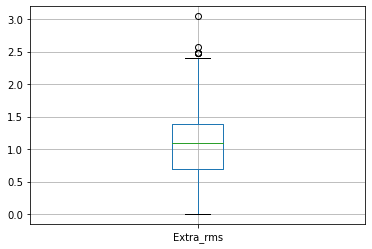

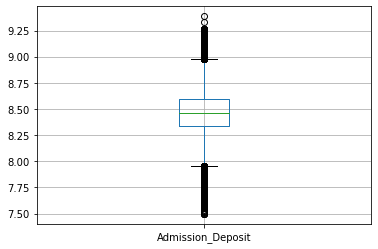

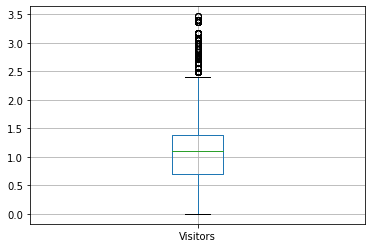

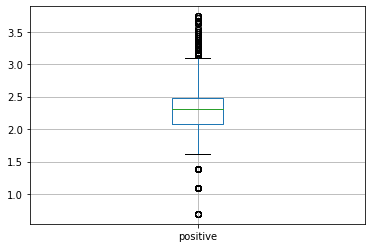

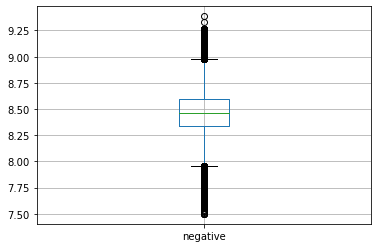

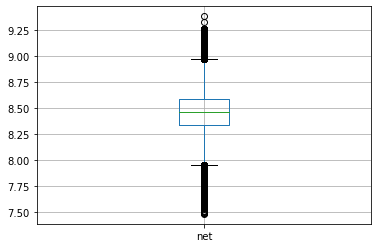

In [59]:
for column in log_columns:
    df_test[column] = df_test[column].map(lambda i: np.log(i) if i > 0 else 0) 
    df_test.boxplot([column])
    plt.show()

In [60]:
df_train[features].head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,negative,net
0,19,2,2,2,1.098612,3,2,5,1,24,0,2,0.693147,5,8.499233,8.499844,8.497806
1,29,2,4,2,0.693147,3,5,5,1,24,1,2,0.693147,5,8.691819,8.692154,8.690474
2,17,4,0,0,0.693147,1,5,4,1,24,1,2,0.693147,5,8.464847,8.465268,8.463159
3,25,1,1,1,0.693147,3,2,3,1,24,1,2,0.693147,5,8.891787,8.892062,8.890686
4,25,1,1,1,0.693147,3,5,3,1,24,1,2,0.693147,5,8.622994,8.623353,8.621553


In [62]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_rms,Department,Ward_Type,Ward_Facility_Code,Bed,City_Code_Patient,Admission,Illness,Visitors,Age,Admission_Deposit,negative,net
0,19,2,2,2,1.098612,3,2,5,1,24,0,2,0.693147,5,8.499233,8.499844,8.497806
1,29,2,4,2,0.693147,3,5,5,1,24,1,2,0.693147,5,8.691819,8.692154,8.690474
2,17,4,0,0,0.693147,1,5,4,1,24,1,2,0.693147,5,8.464847,8.465268,8.463159
3,25,1,1,1,0.693147,3,2,3,1,24,1,2,0.693147,5,8.891787,8.892062,8.890686
4,25,1,1,1,0.693147,3,5,3,1,24,1,2,0.693147,5,8.622994,8.623353,8.621553


In [63]:
df_ans = pd.read_csv("sample_submission_lfbv3c3.csv")

In [ ]:
# rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=13)
# rf_pred = rf.fit(X, y).predict(df_test)
# rf.oob_score_*100

In [ ]:
# def bagging(model):
#     bgr = BaggingClassifier(base_estimator=model, n_estimators=100)
#     print(bgr.fit(X_train, y_train).score(X_test, y_test)*100)
#     print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(bgr.predict(X_train))))}")
#     print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(bgr.predict(X_test))))}")
# def ada_boost(model):
#     ada = AdaBoostClassifier(base_estimator=model,n_estimators=5)
#     return ada.fit(X, y).predict(df_test)

In [ ]:
# y_pred = ada_boost(rf)

In [ ]:
# lgbm = LGBMClassifier(max_depth=8, learning_rate=0.2, n_estimators=300, feature_fraction=1, min_data_in_leaf=16,
#                       objective="multiclass", num_leaves=100)
# y_pred = lgbm.fit(X, y).predict(df_test)
# y_pred = pd.Series(y_pred)
# inv_dict = {v: k for k, v in target_mapping.items()} 
# inv_dict
# y_ans = y_pred.map(inv_dict)
# df_ans["Stay"] = y_ans
# df_ans.to_csv("Submission.csv", index=False)

In [65]:
xgb = XGBClassifier(max_depth = 10, num_parallel_tree=7, n_estimators=100, 
                   objective ='reg:logistic', colsample_bytree = 0.99, 
                   learning_rate = 0.3, alpha = 0.2)
y_pred = xgb.fit(X, y).predict(df_test[features])
y_pred = pd.Series(y_pred)
inv_dict = {v: k for k, v in target_mapping.items()} 
inv_dict
y_ans = y_pred.map(inv_dict)
df_ans["Stay"] = y_ans
df_ans.to_csv("Submission.csv", index=False)

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
target_mapping.items()

In [ ]:
inv_dict = {v: k for k, v in target_mapping.items()} 
inv_dict

In [ ]:
y_ans = y_pred.map(inv_dict)

In [ ]:
y_ans

In [ ]:
df_ans = pd.read_csv("sample_submission_lfbv3c3.csv")

In [ ]:
df_ans["Stay"] = y_ans

In [ ]:
df_ans

In [ ]:
df_ans.to_csv("Submission.csv", index=False)